# Algoritmo de búsqueda primero en amplitud

El algoritmo de búsqueda primero en amplitud o breadth first search se basa en expandir los nodos del árbol de búsqueda de manera ordenada, jerárquica; primero expandirá el nodo raíz y posteriormente cada uno de sus hijos. Entonces procederá a expandir los hijos del primer nodo que expandió primero y así hasta expandir todos los nodos.

Es decir, el algoritmo de primero en amplitud expande todos los nodos de un nivel de profundidad del árbol primero para pasar a expandir los del siguiente nivel.

Aquí presentamos una implementación del algoritmo de primero en amplitud para solucionar el problema del laberinto, en donde buscamos llevar un punto 'o' hacia la meta marcada con 'x'. Generamos el laberinto.

### Creación del problema de laberinto

El problema del laberinto presenta un agente que marcamos como 'o' que inicia en un punto del mapa del laberinto y tiene que llegar a la salida marcada con 'x'. Usamos la clase para simular este ambiente.

In [1]:
from maze_simulator import Maze

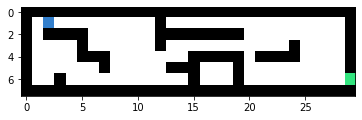

In [2]:
mapa = """
##############################
# o         #                #
# ####      ########         #
#    #      #           #    #
#    ###       ##### ####    #
#      #     ###   #         #
#  #           #   #         x
##############################
"""

ent = Maze(mapa)
ent.draw()

## Creación del algoritmo primero en amplitud

El algoritmo primero en amplitud requiere de una pila de tipo FIFO, asimismo, definiremos una clase para los nodos del árbol y una función para expandir estos nodos construyendo los nodos hijos.

#### Pila

La pila FIFO (First-In-First-Out) es una pila que hace pop sobre los elementos que han entrado primero. De esta forma, en la expansión del árbol de búsqueda se tiene que los nodos que se expandirán primero son aquellos que están más arriba en la jerárquía del árbol, es decir, los de menor profundidad.

Para definir esta pila, usamos una lista que guarda los elementos/nodos. Definimos la función <i>push</i> que introducirá nuevos elementos, y la función <i>pop</i> que sacará al elemento en la cola de la pila. También requerimos de una función que nos indique cuando la pila está vacía, pues esta se usará en el algoritmo.

In [3]:
class FIFOQueue(object):
    """Clase de una cola FIFO en los problemas de búsqueda"""
    def __init__(self):
        self.queue = []
  
    def __str__(self):
        return ' '.join([str(q) for q in self.queue])
  
    def isEmpty(self):
        """Revisa si la pila es vacía"""
        return self.queue == []
  
    def push(self, element):
        """Introudce un elemento a la pila"""
        self.queue.append(element)
  
    def pop(self):
        """Saca el primer elemento de la pila"""
        first_element = self.queue[0]
        del self.queue[0]
    
        return first_element
    
    def top(self):
        """Muestra el elemento en el tope de la pila"""
        item = self.queue[0]
        
        return item

#### Expansión de nodos

Definimos un nodo como un objecto que tendrá los siguientes elementos: 1) un estado, que indicará precisamente qué estado del mundo representa este nodo; 2) padre, que indica de dónde viene el nodo actual; y 3) acción, que indica que acción generó al nodo.

Para expandir los nodos, usamos las acciones legales y aplicamos la función que nos da el resultado de esa acción aplicada al estado actual. Con el resultado, generamos nuevos nodos hijos del árbol de búsqueda.

In [4]:
class Node(object):
    """Clase para crear nodos con sus atributos"""
    def __init__(self):
        self.state = (0,0)
        self.parent = None 
        self.action = None
        #self.cost = 0 #El costo no es tomado en cuenta en este método
        
    def __str__(self):
        if self.parent == None:
            return "State: {}, Cost: {}".format(self.state,self.cost)
        else:
            return "State: {}, Action: {}, Parent: {}, Cost: {}".format(self.state,self.action,self.parent.state,self.cost)
            
            
def expand(problem, node):
    """Función para expandir los nodos dado el problema"""
    #Nodo inical
    s = node.state 

    for action in problem.actions(s):
        #Ejecuta la acción
        new_s = problem.result(s, action)
        
        #Genera un nuevo nodo
        new_node,new_node.state,new_node.parent,new_node.action = Node(),new_s,node,action
        
        yield new_node

### Algoritmo

El algoritmo, como ya lo hemos señalado, buscará expandir los nodos de menor profunidad primero, por lo que se enfocará en la amplitud del árbol de búsqueda. Para esto, utiliza la pila FIFO para guardar la frontera. Los pasos que sigue el algoritmo son:

1. Guarda el nodo inicial
2. Genera la frontera con este primer nodo, y guarda los estados alcanzados
3. Mientras la frontera no esté vacía realiza:
    1. Expande el nodo con jerarquía más alta de la frontera
    2. Revisa si el hijo no es meta, si lo es acaba
    3. En otro caso, guarda el nodo hijo en la frontera si esté no ha sido alcanzado todavía
 
El algoritmo termina al alcanzar la meta, o bien al agotar los nodos posibles sin encontrar esta meta.

El algoritmo revisa si un nodo es meta inmediatamente cuando este surge en una expansión, estrategia que se conoce como <i>Early Goal Test</i> (prueba temprana de meta).

In [5]:
def BreadthFirstSearch(problem):
    """Algoritmo Breadth-First Search"""
    #Almacenamiento de nodos
    nodes = []
    #Nodo inicial
    node = Node()
    node.state = problem.initial
    
    #Revisa si el nodo es meta
    if node in problem.goal:
        return nodes
    
    #Frontera con cola de prioridad
    frontier = FIFOQueue()
    frontier.push(node)
    #Nodos alcanzados
    reached = {problem.initial:node}

    #Mientras la frontera no esté vacía
    while frontier.isEmpty() == False:
        #Pop en frontera
        node = frontier.pop()
        #Guarda el nodo en la lista
        nodes.append(node)
        
        #Expande el nodo actual
        for child in expand(problem, node):
            #Guarda el estado del hijo
            state = child.state
            
            #Revisa si el nodo es meta
            if problem.is_goal(state):
                nodes.append(child)
                return nodes
            
            #Guarda los hijos no alcanzados o que tengan menor costo
            if state not in reached.keys():
                reached[state] = child
                frontier.push(child)
        
    #Si no logra llegar a un nodo final
    #El algoritmo regresa mensaje de error
    return "No se ha logrado llegar a un estado final."

#### Aplición del algoritmo

Aplicamos entonces el algoritmo de primero en profundidad al problema del laberinto. Esto generará el árbol de búsqueda, en donde, si lo ha hecho correctamente, ha alcanzado el estado meta y por tanto ha generado el camino de acciones que llevan a la meta.

In [6]:
#Aplica el algortimo al problema
tree = BreadthFirstSearch(ent)

Definimos una función que nos permita recuperar del árbol de búsqueda los nodos que definen el camino encontrado. Simplemente recorremos el árbol desde el nodo meta hasta el nodo raíz; el camino encontrado, será el que nos lleva a la solución.

A partir de esto, podemos visualizar la solución; en este caso, podemos visualizar el camino que siguió el agente desde el punto en el que inició hasta la meta.

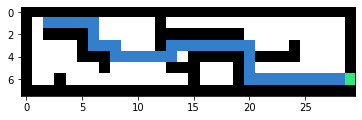

In [7]:
def get_path(search_tree, root):
    """Recorre el árbol de búsqueda de atrás hacia el inicio para obtener el camino de acciones
    que llevaron a la meta."""
    #Meta
    leaf = search_tree[::-1][0]
    #Padre de la meta
    parent = leaf.parent
    #Adjunta la meta y su padre al camino
    path = [leaf, parent]
    #Recorre el árbol de búsqueda hasta el inicial
    while parent.state != root:
        parent = parent.parent
        #Adjunta los padres en el camino
        path.append(parent)
        
    return path[::-1]

#Visualiza la solución
prev_s = ent.initial
for n in get_path(tree, ent.initial):
    ent.move(prev_s, n.state)
    prev_s = n.state
    
ent.draw()